In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

## Import data and preprocess

In [2]:
data = pd.read_csv("NYCgov_Poverty_Measure_Data__2015_.csv")

In [3]:
# Adding column for age-group
bins= np.arange(0,110,10)
labels = ['(' + str(x)+'-'+str(x+10)+']' for x in bins[:-1]]
labels[-1] = labels[-1].replace("100]", "inf)")
data['AgeGroup'] = pd.cut(data['AGEP'], bins=bins, labels=labels, right=True)

# Create dataframe with only adults (finished school)
data_adult = data[data['AGEP'] > 24]

#### Mappings 

In [4]:
EducAttain_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}
SEX_map = {1: 'Male', 2:'Female'}
Boro_map = {1:'Bronx', 2:'Brooklyn',3:'Manhattan',4:'Queens',5:'Staten Island'}
Off_Pov_Stat_map = {1:'In Poverty',2:'Not in Poverty'}
Ethnicity_map = {1:'Non-Hispanic White',2:'Non-Hispanic Black',3:'Non-Hispanic Asian',
    4:'Hispanic, Any Race',5:'Other Race/Ethnic Group'}

In [5]:
data.shape

(69103, 62)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69103 entries, 0 to 69102
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SERIALNO          69103 non-null  int64   
 1   SPORDER           69103 non-null  int64   
 2   PWGTP             69103 non-null  int64   
 3   WGTP              69103 non-null  int64   
 4   AGEP              69103 non-null  int64   
 5   CIT               69103 non-null  int64   
 6   REL               69103 non-null  int64   
 7   SCH               69103 non-null  int64   
 8   SCHG              69103 non-null  int64   
 9   SCHL              66916 non-null  float64 
 10  SEX               69103 non-null  int64   
 11  ESR               56682 non-null  float64 
 12  LANX              65336 non-null  float64 
 13  ENG               31066 non-null  float64 
 14  MSP               57455 non-null  float64 
 15  MAR               69103 non-null  int64   
 16  WKW               3607

In [7]:
# Drop row with missiing values
data_drop = data.dropna()
data_drop.shape

(15069, 62)

In [8]:
data.columns

Index(['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro',
       'CitizenStatus', 'EducAttain', 'EST_Childcare', 'EST_Commuting',
       'EST_EITC', 'EST_FICAtax', 'EST_HEAP', 'EST_Housing', 'EST_IncomeTax',
       'EST_MOOP', 'EST_Nutrition', 'EST_PovGap', 'EST_PovGapIndex',
       'Ethnicity', 'FamType_PU', 'FTPTWork', 'INTP_adj', 'MRGP_adj',
       'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL', 'NYCgov_Threshold',
       'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 'Povunit_ID',
       'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 'SEMP_adj',
       'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj', 'AgeGroup'],
      dtype='object')

In [9]:
features = ['SERIALNO', 'SPORDER', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro',
       'CitizenStatus', 'EducAttain', 'Ethnicity', 'FamType_PU', 'FTPTWork', 
       'INTP_adj', 'MRGP_adj', 'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL',
       'NYCgov_Threshold', 'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 
       'Povunit_ID', 'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 
       'SEMP_adj', 'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj']

#Recode = code in dictionary
# CIT: Citenzenship
# REL: is relationship ie. Daughter, Son, etc. is ACS code ()
# SCH, SCHG: (SCHG is ACS code) for educaiton
# SCHL: Education attainment ACS code
# ESR: Employement status (code in dictionaru file)
# LANX: language other than language spoken 
# ENG: ability to speak english
# MSP: Married or not (code in dictionary file)
# MAR: Marital status 
# WKHP: huors work per week
# DIS: disability (Recode)
# JWTR: transportation to work (ACS)
# NP: number of people in household 
# TEN: Housing tenure
# FamType_PT: PovertyUnit familytype (umiddelbart fjerne)
# FTPTWork: work experience (recode)
# INTP_adj: Income adjusted
# MRGP_adj: Morgage amount adjusted
# SEMP_adj: self employed
# SSIP_adh: supplementary income 
# SSP_adj: social socurity income (people who are disabled)
# WAGP_adj: Wages

## Visulization 

* Number of healty tree in each district 
* Probablity of healthy tree in each district 
* histogram of diameter
* histogram of depth
* plot of location for trees (heatmap)

## Bar-plots for poverty dataset

In [10]:
features = ['SERIALNO', 'SPORDER', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro',
       'CitizenStatus', 'EducAttain', 'Ethnicity', 'FamType_PU', 'FTPTWork', 
       'INTP_adj', 'MRGP_adj', 'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL',
       'NYCgov_Threshold', 'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 
       'Povunit_ID', 'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 
       'SEMP_adj', 'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj']

### Boro

#### Sex in boro

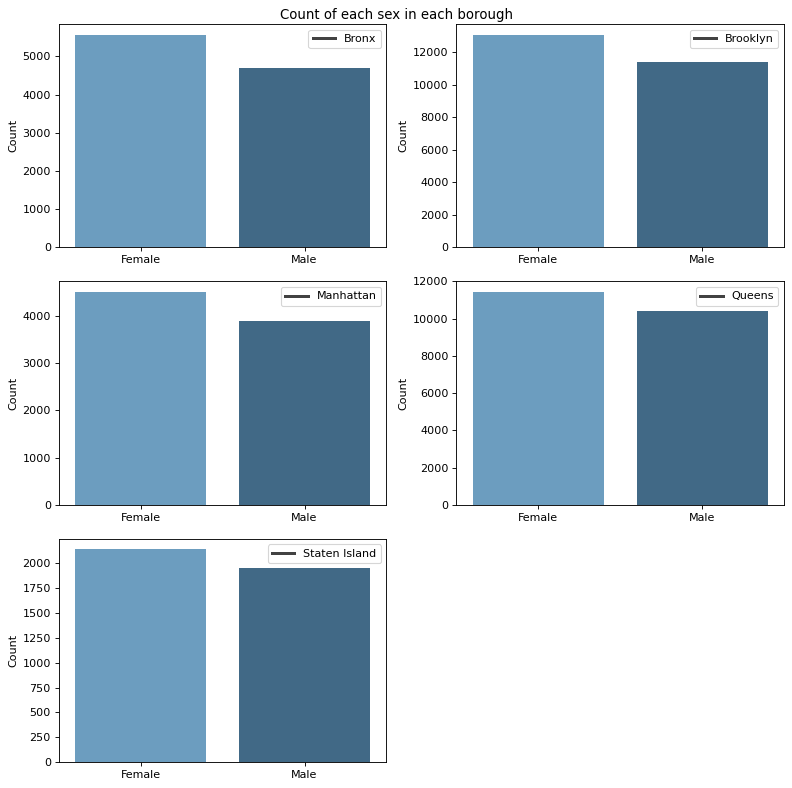

In [11]:

df_city_health = pd.DataFrame(data.groupby(['Boro','SEX'])['SERIALNO'].count()).reset_index()
df_city_health['SEX'].replace([2,1],['Female','Male'],inplace=True)
df_city_health['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Boro'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'SEX', y = 'Count', data = df_city_health[df_city_health.Boro == dist], order = sorted(set(df_city_health.SEX)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Count of each sex in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Education level in boro

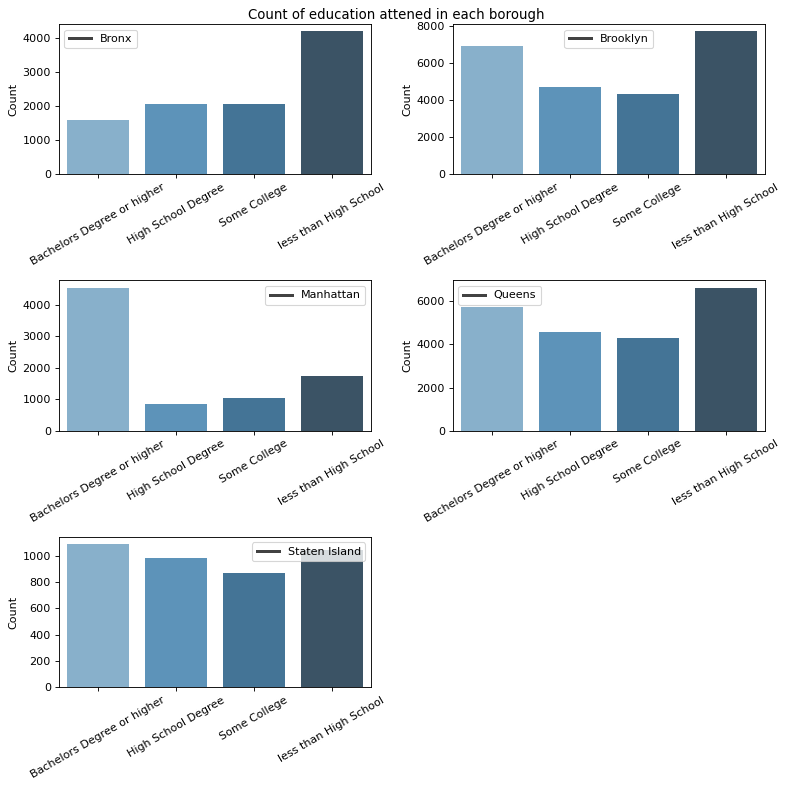

In [12]:
df_city_health = pd.DataFrame(data.groupby(['Boro','EducAttain'])['SERIALNO'].count()).reset_index()
df_city_health['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'],inplace=True)
df_city_health['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Boro'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'EducAttain', y = 'Count', data = df_city_health[df_city_health.Boro == dist], order = sorted(set(df_city_health.EducAttain)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.suptitle('Count of education attened in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Poverty status in boro

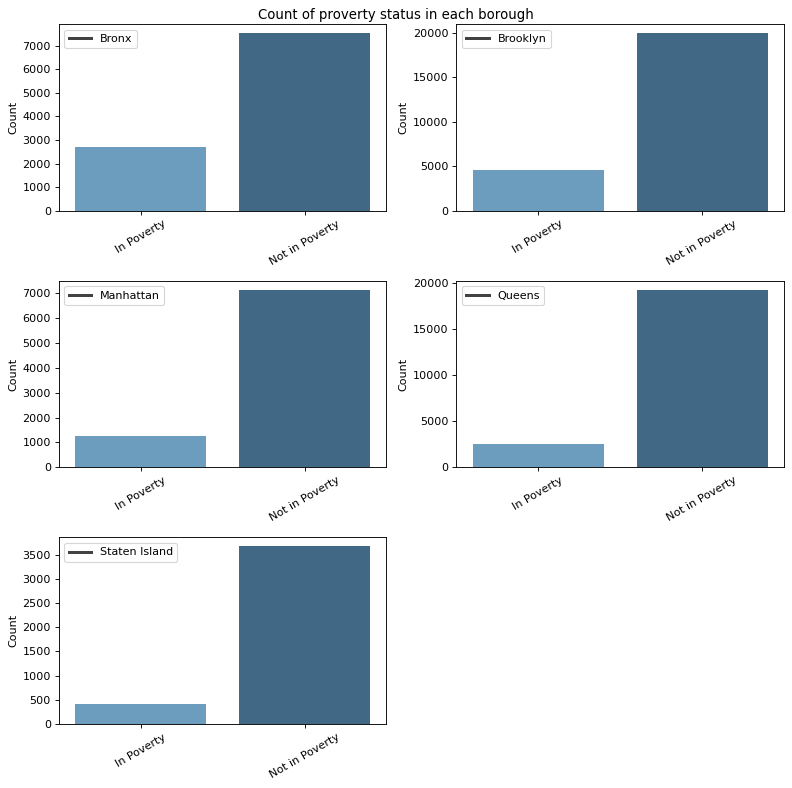

In [13]:
df_city_health = pd.DataFrame(data.groupby(['Boro','Off_Pov_Stat'])['SERIALNO'].count()).reset_index()
df_city_health['Off_Pov_Stat'].replace([1,2],['In Poverty','Not in Poverty'],inplace=True)
df_city_health['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Boro'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'Off_Pov_Stat', y = 'Count', data = df_city_health[df_city_health.Boro == dist], order = sorted(set(df_city_health.Off_Pov_Stat)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.suptitle('Count of proverty status in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Age group in boro

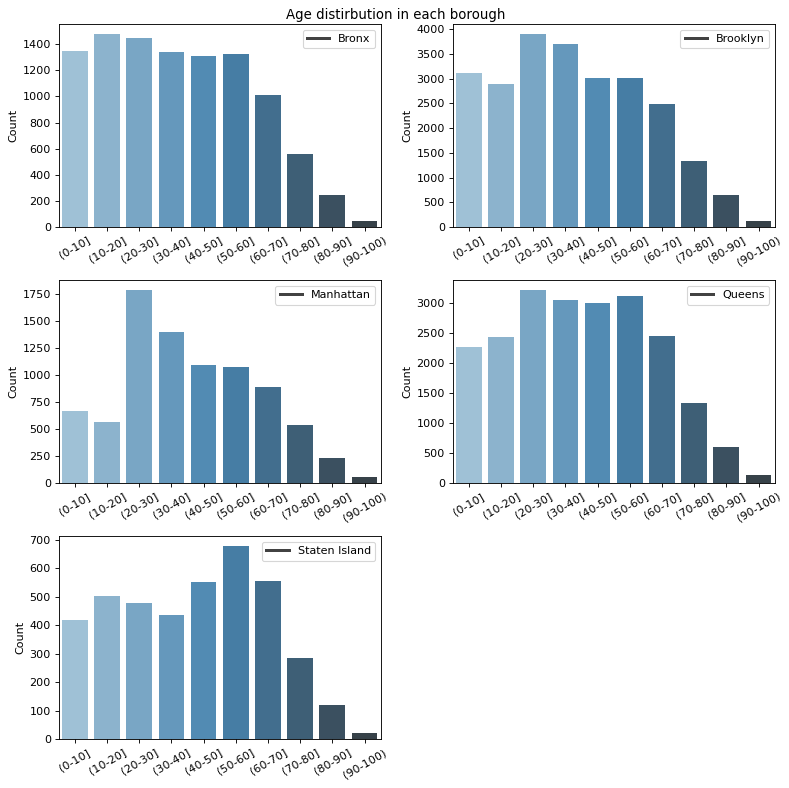

In [14]:
## Create age-group
bins= np.arange(0,110,10)
labels = ['(' + str(x)+'-'+str(x+10)+']' for x in bins[:-1]]
labels[-1] = labels[-1].replace("]", ")")
data['AgeGroup'] = pd.cut(data['AGEP'], bins=bins, labels=labels, right=True)

df_city_health = pd.DataFrame(data.groupby(['Boro','AgeGroup'])['SERIALNO'].count()).reset_index()
#df_city_health['AGEP'].replace([1,2],['In Poverty','Not in Poverty'],inplace=True)
df_city_health['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Boro'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'AgeGroup', y = 'Count', data = df_city_health[df_city_health.Boro == dist], order = sorted(set(df_city_health.AgeGroup)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.suptitle('Age distirbution in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Salary in boro (Aggrigated salary) histogram 

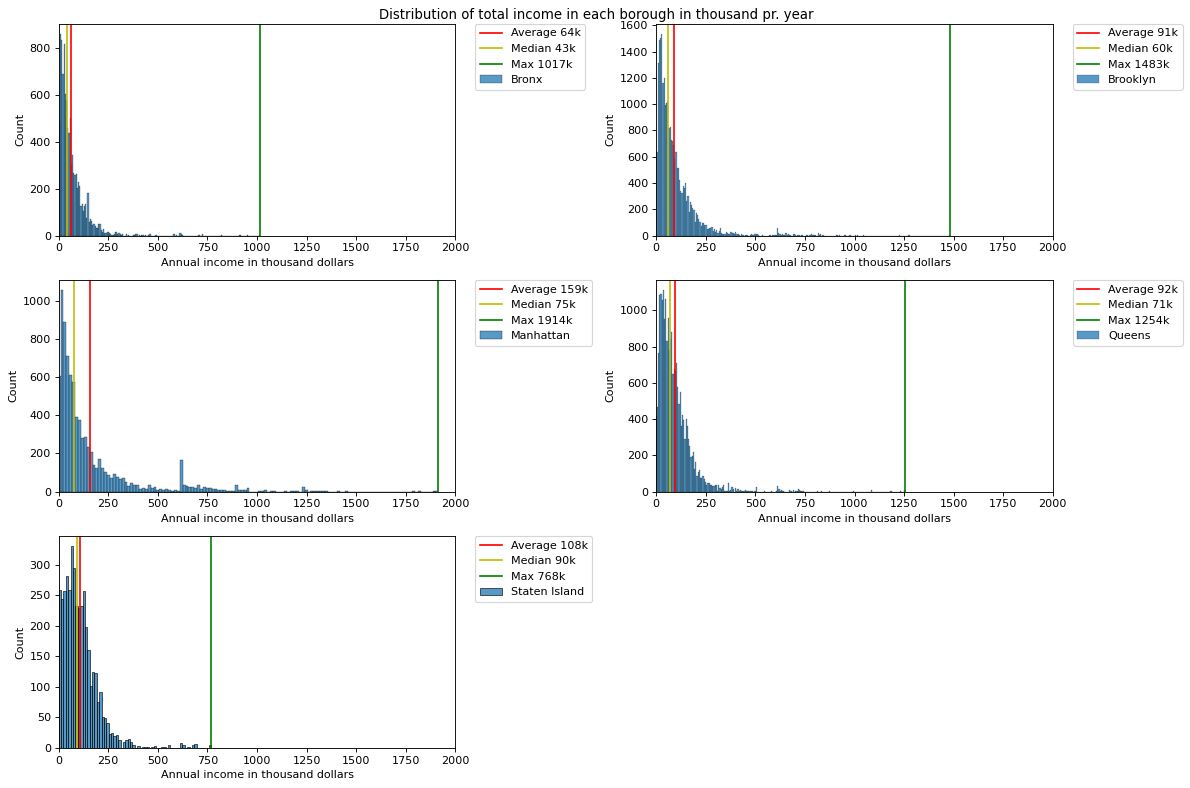

In [15]:
income_col = ['PreTaxIncome_PU', 'OI_adj']

data['Total_income'] = (data['PreTaxIncome_PU'] + data['OI_adj'])/1000
data['Boro_name'] = data['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'])
boro_map = {1:'Bronx', 2:'Brooklyn',3:'Manhattan',4:'Queens',5:'Staten Island'}

## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(set(data['Boro'])): 
    data_boro = data[data['Boro'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income")
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k', boro_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(0,2000)
    plt.xlabel('Annual income in thousand dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total income in each borough in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


#### Average income pr boro

In [16]:
pd.DataFrame(data.groupby('Boro_name').mean()['Total_income'])

,Total_income
Boro_name,
Bronx,63.508739
Brooklyn,91.083187
Manhattan,158.996808
Queens,92.305275
Staten Island,107.773625


#### Ethnicity

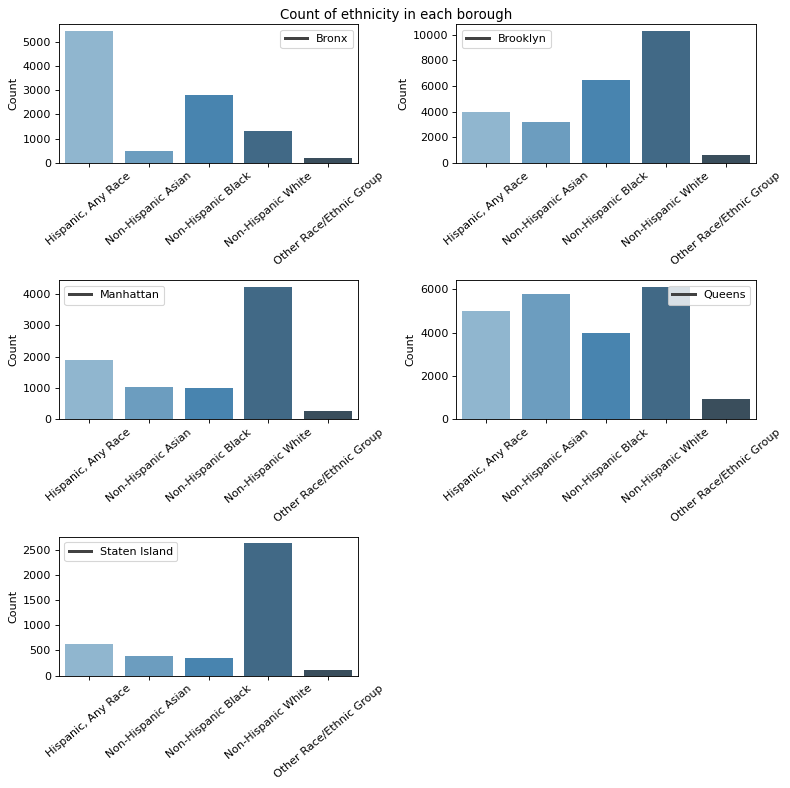

In [17]:
df_city_health = pd.DataFrame(data.groupby(['Boro_name','Ethnicity'])['SERIALNO'].count()).reset_index()
df_city_health['Ethnicity'].replace([1,2,3,4,5],['Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian',
    'Hispanic, Any Race','Other Race/Ethnic Group'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in list(boro_map.values()): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'Ethnicity', y = 'Count', data = df_city_health[df_city_health.Boro_name == dist], order = sorted(set(df_city_health.Ethnicity)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.suptitle('Count of ethnicity in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Citizenship 

C:\Users\miaha\AppData\Local\Temp/ipykernel_13896/4166137522.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


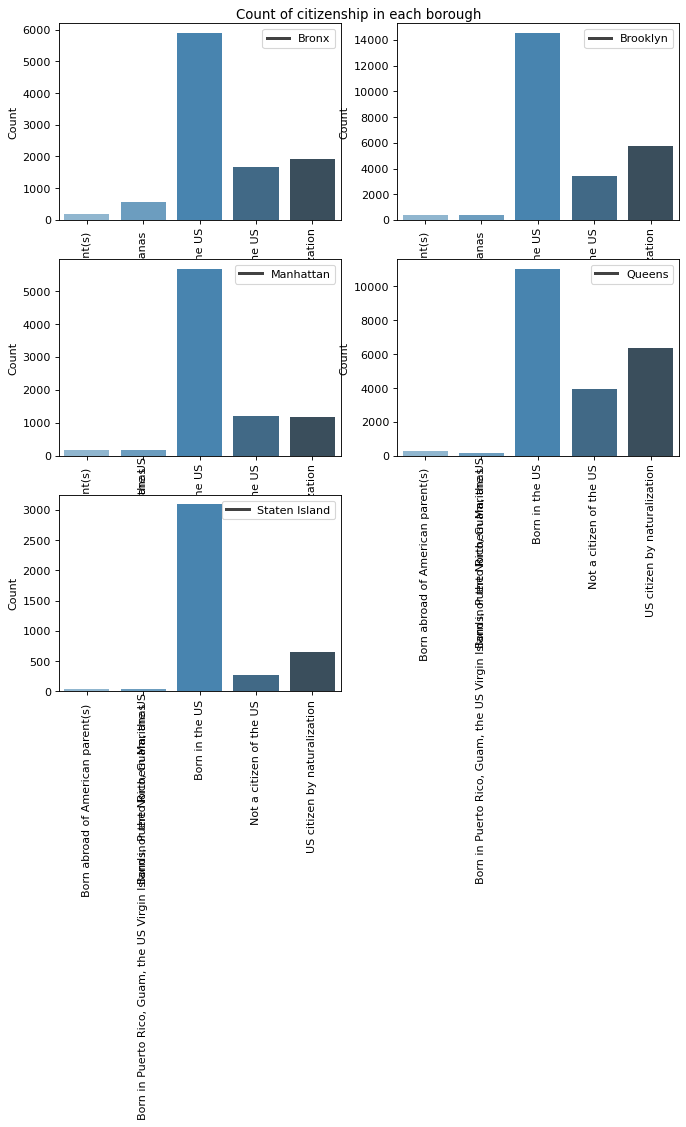

In [18]:
df_city_health = pd.DataFrame(data.groupby(['Boro_name','CIT'])['SERIALNO'].count()).reset_index()
df_city_health['CIT'].replace([1,2,3,4,5],['Born in the US','Born in Puerto Rico, Guam, the US Virgin Islands, or the Northern Marianas ','Born abroad of American parent(s) ',
    'US citizen by naturalization','Not a citizen of the US'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in list(boro_map.values()): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'CIT', y = 'Count', data = df_city_health[df_city_health.Boro_name == dist], order = sorted(set(df_city_health.CIT)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.suptitle('Count of citizenship in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Education and salary

In [19]:
bins_sturges(len(data_boro))

NameError: name 'bins_sturges' is not defined

ValueError: Could not interpret value `Total_income` for parameter `x`

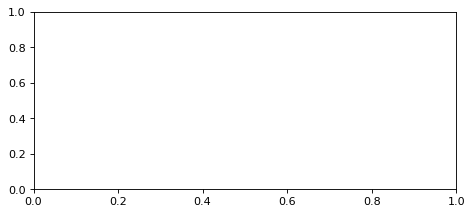

In [50]:
income_col = ['PreTaxIncome_PU', 'OI_adj']

data.loc['Total_income'] = (data['INTP_adj'] + data['SEMP_adj'] + data['WAGP_adj'] +data['RETP_adj']  )/1000
data['EducAttain_text'] = data['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'])
#data['Boro_name'] = data['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'])
#boro_map = {1:'Bronx', 2:'Brooklyn',3:'Manhattan',4:'Queens',5:'Staten Island'}
Education_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}

## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data['EducAttain'])[:-1]): 
    data_boro = data[data['EducAttain'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income")
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k', Education_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(0,2000)
    plt.xlabel('Annual income in thousand dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total income in each borough in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


C:\Users\miaha\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


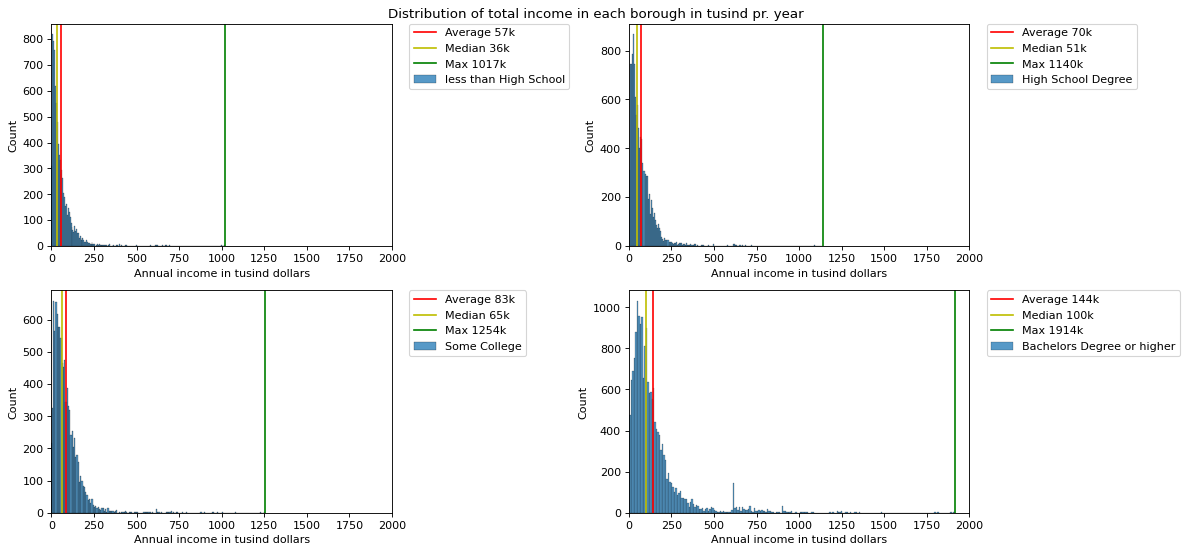

In [52]:
All_income = ['INTP_adj', 'OI_adj', 'PA_adj', 'RETP_adj','SEMP_adj', 'SSIP_adj', 'SSP_adj', 'WAGP_adj']
self_income = ['INTP_adj', 'SEMP_adj', 'WAGP_adj', 'RETP_adj']

data_adult = data[data['AGEP'] > 24]

data_adult.loc['Total_income'] = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj']  )/1000
data_adult.loc['EducAttain_text'] = data_adult['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'])
#data['Boro_name'] = data['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'])
#boro_map = {1:'Bronx', 2:'Brooklyn',3:'Manhattan',4:'Queens',5:'Staten Island'}
Education_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}


## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['EducAttain'])[:-1]): 
    data_boro = data_adult[data_adult['EducAttain'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income")
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k', Education_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(0,2000)
    plt.xlabel('Annual income in thousand dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total income in each borough in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


In [44]:
data[data['AGEP'] < 24][['SERIALNO', 'WAGP_adj']]

,SERIALNO,WAGP_adj
4,46,0.0
5,46,0.0
15,444,0.0
16,444,0.0
17,444,0.0
...,...,...
69083,1512926,0.0
69084,1512926,0.0
69091,1513202,0.0
69092,1513202,0.0


In [49]:
data[['SERIALNO', 'SSIP_adj']]

,SERIALNO,SSIP_adj
0,17,0.0
1,17,0.0
2,46,0.0
3,46,0.0
4,46,0.0
...,...,...
69098,1513216,0.0
69099,1513253,0.0
69100,1513253,0.0
69101,1513253,0.0


In [50]:
data[data['SSIP_adj']>0 ][['SERIALNO', 'SSIP_adj']]

,SERIALNO,SSIP_adj
9,275,1802.2751
19,554,5006.3198
24,623,4205.3086
59,887,10112.7670
88,1481,8510.7441
...,...,...
68879,1508103,9812.3867
69014,1511637,3504.4241
69085,1513044,7409.3535
69093,1513202,2903.6655


In [20]:
All_income = ['INTP_adj', 'OI_adj', 'PA_adj', 'RETP_adj','SEMP_adj', 'SSIP_adj', 'SSP_adj', 'WAGP_adj']
well_income = ['PA_adj', 'SSIP_adj','SSP_adj']
self_income = ['INTP_adj', 'SEMP_adj', 'WAGP_adj', 'RETP_adj']

### Bar plot based on salary

In [19]:
import math
def bins_sturges(n):
    return int(1 + np.ceil(math.log(n)))

def bins_freedamn_diaconis(data):
    q3 = np.quantile(data, 0.75)
    q1 = np.quantile(data, 0.25)
    b_w = 2*(q3-q1)/(np.cbrt(len(data)))
    if b_w == 0: 
        b_w = 1
    bins = int(np.ceil((max(data) - min(data))/b_w))
    return bins 

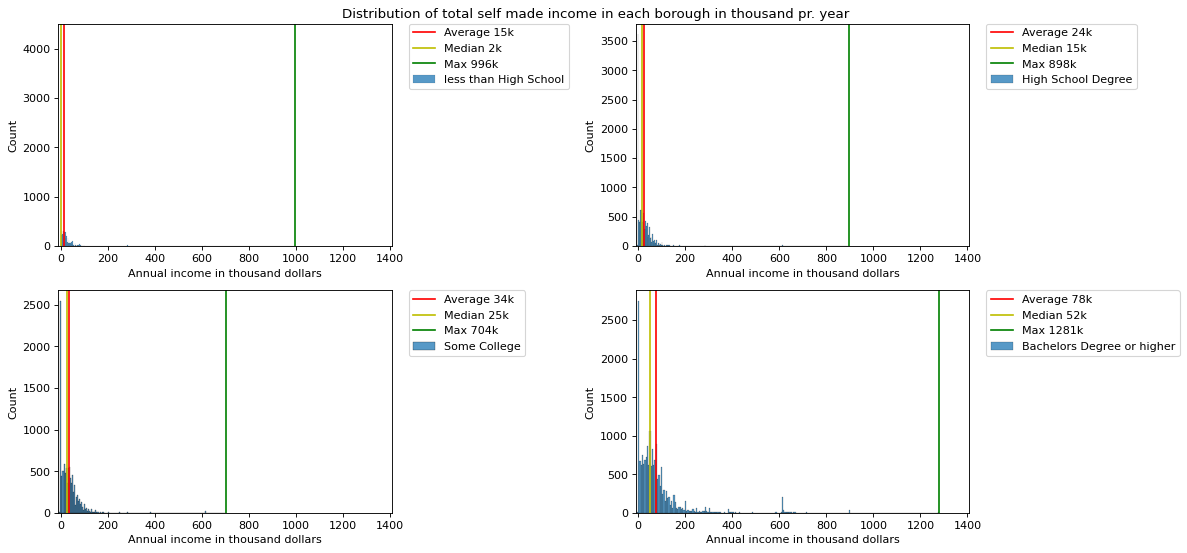

In [77]:
data_adult = data[data['AGEP'] > 24]
temp_col = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj'])/1000
data_adult.insert(1, "Total_income", temp_col, True)

Education_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}


## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['EducAttain'])): 
    data_boro = data_adult[data_adult['EducAttain'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income", bins = bins_freedamn_diaconis(data_boro['Total_income']))
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k', Education_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-10,data_adult['Total_income'].max()*1.10)
    plt.xlabel('Annual income in thousand dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total self made income in each borough in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


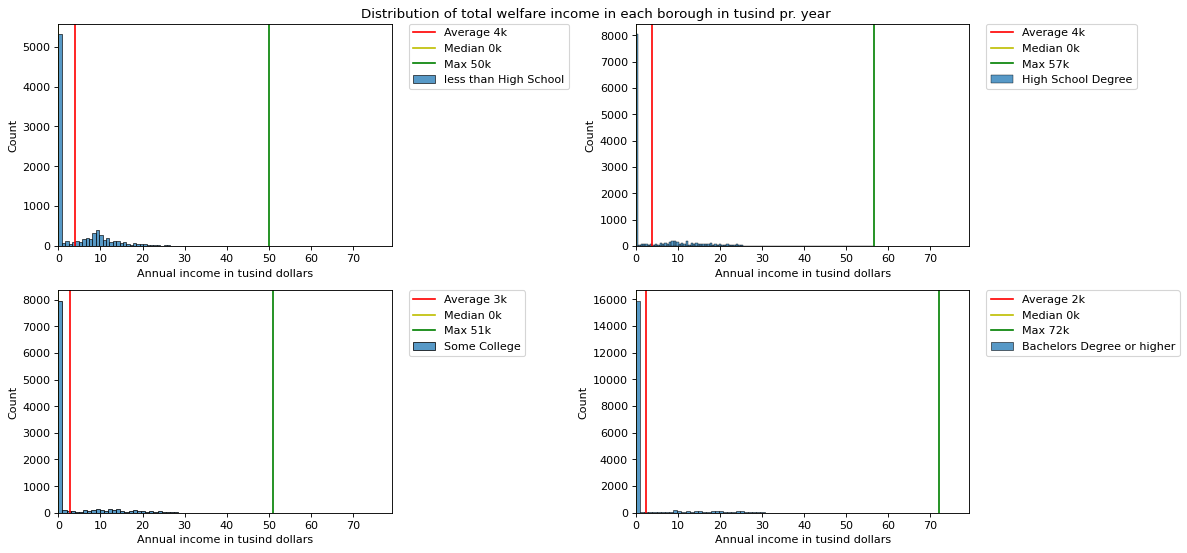

In [78]:
### 
data_adult = data[data['AGEP'] > 24]
temp_col = (data_adult[well_income].sum(axis=1))/1000
data_adult.insert(1, "Total_wel_income", temp_col, True)

Education_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}


## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['EducAttain'])): 
    data_boro = data_adult[data_adult['EducAttain'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_wel_income",bins = bins_freedamn_diaconis(data_boro['Total_wel_income']))
    plt.axvline(data_boro['Total_wel_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_wel_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_wel_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_wel_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_wel_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_wel_income'].max())) + 'k', Education_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(data_adult['Total_wel_income'].min(),data_adult['Total_wel_income'].max()*1.10)
    plt.xlabel('Annual income in tusind dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total welfare income in each borough in tusind pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


In [79]:
## Percentage getting money cause welfare 
len(data_adult[(data_adult['EducAttain'] == 1) & (data_adult['Total_wel_income'] >0)])/len(data_adult[(data_adult['EducAttain'] == 1)]),len(data_adult[(data_adult['EducAttain'] == 2) & (data_adult['Total_wel_income'] >0)])/len(data_adult[(data_adult['EducAttain'] == 2)]),len(data_adult[(data_adult['EducAttain'] == 3) & (data_adult['Total_wel_income'] >0)])/len(data_adult[(data_adult['EducAttain'] == 3)]),len(data_adult[(data_adult['EducAttain'] == 4) & (data_adult['Total_wel_income'] >0)])/len(data_adult[(data_adult['EducAttain'] == 4)])

(0.39727751086707846,
 0.3054110301768991,
 0.21293611916425073,
 0.14952416796601967)

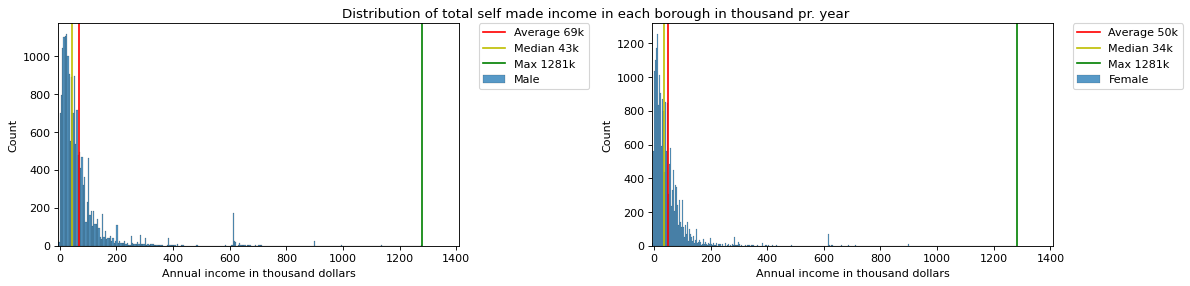

In [20]:
data_adult = data[data['AGEP'] > 24]
temp_col = (data_adult['INTP_adj'] + data_adult['SEMP_adj'] + data_adult['WAGP_adj'] +data_adult['RETP_adj'])/1000
data_adult.insert(1, "Total_income", temp_col, True)

data_above = data_adult[data_adult['Total_income'] != 0]

Education_map = {1:'less than High School',2:'High School Degree',3:'Some College',4:'Bachelors Degree or higher'}
SEX_map = {1: 'Male', 2:'Female'}

## Plot
figure(figsize=(15, 10), dpi=80)
i = 1
for dist in sorted(np.unique(data_adult['SEX'])): 
    #data_boro = data_adult[data_adult['SEX'] == dist]
    data_boro = data_above[data_above['SEX'] == dist]
    plt.subplot(3, 2, i)
    sns.histplot(data=data_boro, x="Total_income", bins = bins_freedamn_diaconis(data_boro['Total_income']))
    plt.axvline(data_boro['Total_income'].mean(), color = 'r')
    plt.axvline(data_boro['Total_income'].median(), color = 'y')
    plt.axvline(data_boro['Total_income'].max(), color = 'g')
    plt.legend(labels=['Average ' + str(round(data_boro['Total_income'].mean())) + 'k','Median ' + str(round(data_boro['Total_income'].median())) + 'k',
     'Max ' + str(round(data_boro['Total_income'].max())) + 'k', SEX_map[dist]], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(data_adult['Total_income'].min(),data_adult['Total_income'].max()*1.10)
    plt.xlabel('Annual income in thousand dollars')
    plt.ylabel('Count')
    i += 1
plt.suptitle('Distribution of total self made income in each borough in thousand pr. year')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()


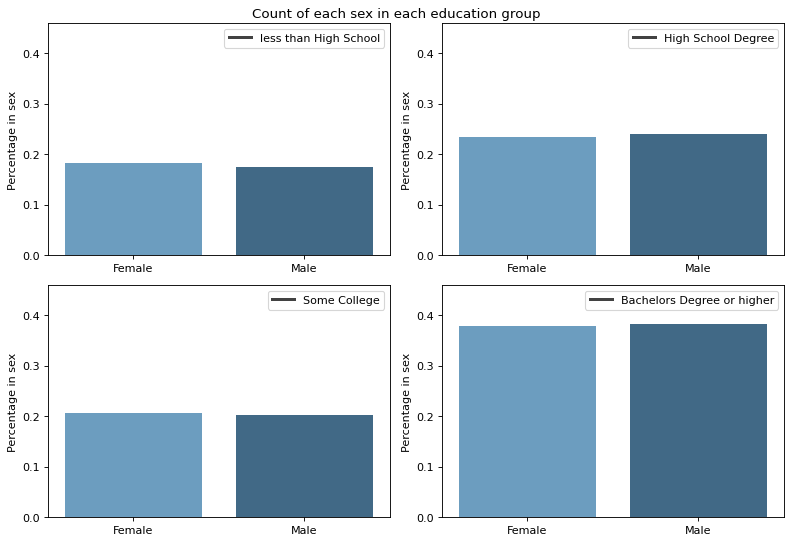

In [95]:

df_city_health = pd.DataFrame(data_adult.groupby(['EducAttain','SEX'])['SERIALNO'].count()).reset_index()
df_city_health['SEX'].replace([2,1],['Female','Male'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)
df_city_health.loc[df_city_health['SEX'] == 'Male', 'Count'] /= sum(df_city_health.loc[df_city_health['SEX'] == 'Male', 'Count'])
df_city_health.loc[df_city_health['SEX'] == 'Female', 'Count'] /= sum(df_city_health.loc[df_city_health['SEX'] == 'Female', 'Count'])


## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['EducAttain'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'SEX', y = 'Count', data = df_city_health[df_city_health.EducAttain == dist], order = sorted(set(df_city_health.SEX)),\
        palette="Blues_d")
    plt.legend(labels=[Education_map[dist]])
    plt.xlabel('')
    plt.ylabel('Percentage in sex')
    plt.ylim(0, df_city_health['Count'].max()*1.2)
    i += 1
plt.suptitle('Count of each sex in each education group')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

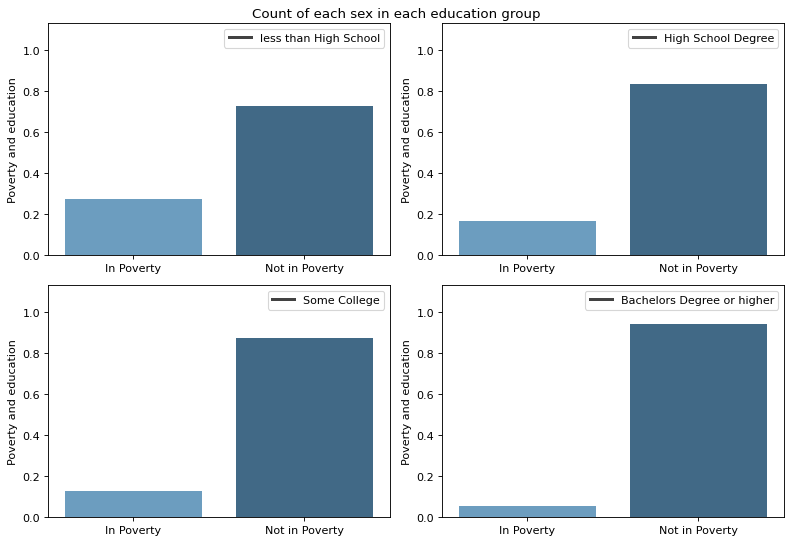

In [11]:

df_city_health = pd.DataFrame(data_adult.groupby(['EducAttain','Off_Pov_Stat'])['SERIALNO'].count()).reset_index()
df_city_health['Off_Pov_Stat'].replace([2,1],['Not in Poverty','In Poverty'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

for i in range(5):
    df_city_health.loc[df_city_health['EducAttain'] == i, 'Count'] /= sum(df_city_health.loc[df_city_health['EducAttain'] == i, 'Count'])


## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['EducAttain'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'Off_Pov_Stat', y = 'Count', data = df_city_health[df_city_health.EducAttain == dist], order = sorted(set(df_city_health.Off_Pov_Stat)),\
        palette="Blues_d")
    plt.legend(labels=[EducAttain_map[dist]])
    plt.xlabel('')
    plt.ylabel('Poverty and education')
    plt.ylim(0, df_city_health['Count'].max()*1.2)
    i += 1
plt.suptitle('Count of each sex in each education group')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

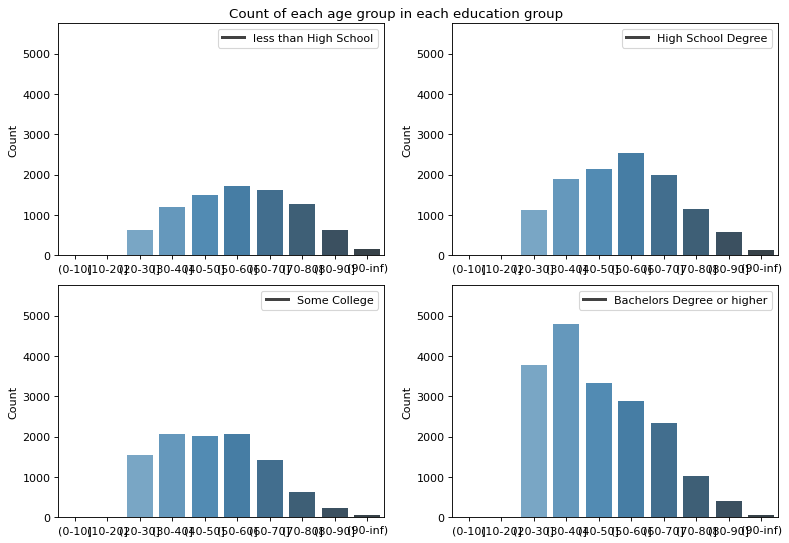

In [102]:

df_city_health = pd.DataFrame(data_adult.groupby(['EducAttain','AgeGroup'])['SERIALNO'].count()).reset_index()
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['EducAttain'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'AgeGroup', y = 'Count', data = df_city_health[df_city_health.EducAttain == dist], order = sorted(set(df_city_health.AgeGroup)),\
        palette="Blues_d")
    plt.legend(labels=[EducAttain_map[dist]])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.ylim(df_city_health['Count'].min(), df_city_health['Count'].max()*1.2)
    i += 1
plt.suptitle('Count of each age group in each education group')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

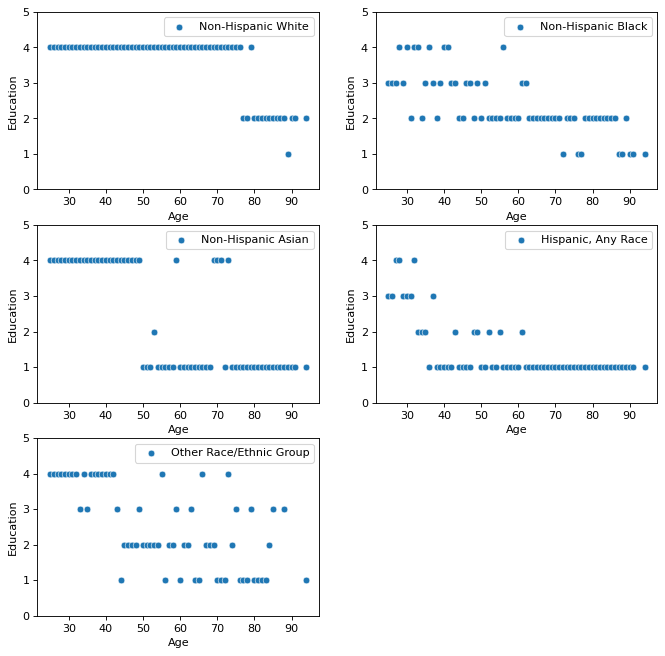

In [138]:
Ethnicity_map = {1:'Non-Hispanic White',2:'Non-Hispanic Black',3:'Non-Hispanic Asian',
    4:'Hispanic, Any Race',5:'Other Race/Ethnic Group'}
    

figure(figsize=(10, 10), dpi=80)
i = 1
for eth in list(Ethnicity_map.keys()):
    plt.subplot(3, 2, i)
    data_temp =  data_adult[data_adult['Ethnicity'] == eth]
    age_edu = {}
    for age in list(set(data_temp['AGEP'])):
        age_edu[age] = data_temp.loc[data_temp['AGEP']==age,'EducAttain'].mode()
    ax = sns.scatterplot(x = 'Age', y = 'Education', data = pd.DataFrame(age_edu).transpose().reset_index().rename({'index': 'Age', 0:'Education'}, axis='columns'),\
        palette="Blues_d")
    plt.legend(labels=[Ethnicity_map[eth]])
    plt.xlabel('Age')
    plt.ylabel('Education')
    plt.ylim(0,5)
    i += 1

#### Education based on race and sex

In [187]:
SEX_map.values()

dict_values(['Male', 'Female'])

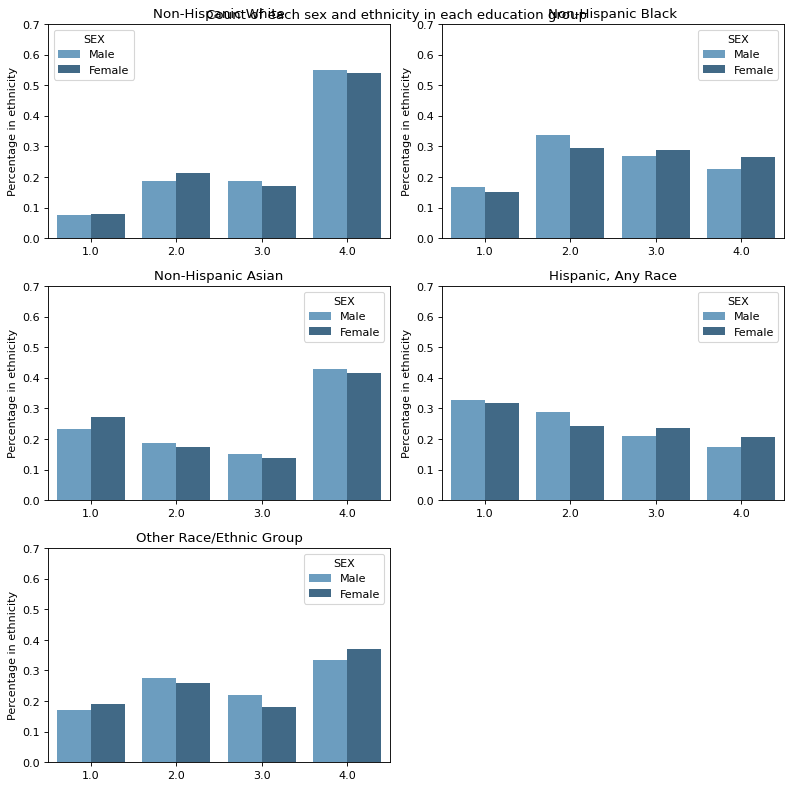

In [205]:

df_city_health = pd.DataFrame(data_adult.groupby(['EducAttain','Ethnicity','SEX'])['SERIALNO'].count()).reset_index()
df_city_health['SEX'].replace([2,1],['Female','Male'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)
for eth in list(Ethnicity_map.keys()): 
    for sex in list(SEX_map.values()):
        df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex) , 'Count'] = df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex) , 'Count']/(sum(df_city_health.loc[(df_city_health['Ethnicity'] == eth) &(df_city_health['SEX'] == sex), 'Count']))

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Ethnicity'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'EducAttain', y = 'Count',hue='SEX', data = df_city_health[df_city_health.Ethnicity == dist], order = sorted(set(df_city_health.EducAttain)),\
        palette="Blues_d")
    #plt.legend(labels=[Education_map[dist],'Male', 'Female'])
    plt.xlabel('')
    plt.ylabel('Percentage in ethnicity')
    plt.ylim(0, 0.7)
    plt.title(Ethnicity_map[dist])
    i += 1
plt.suptitle('Count of each sex and ethnicity in each education group')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

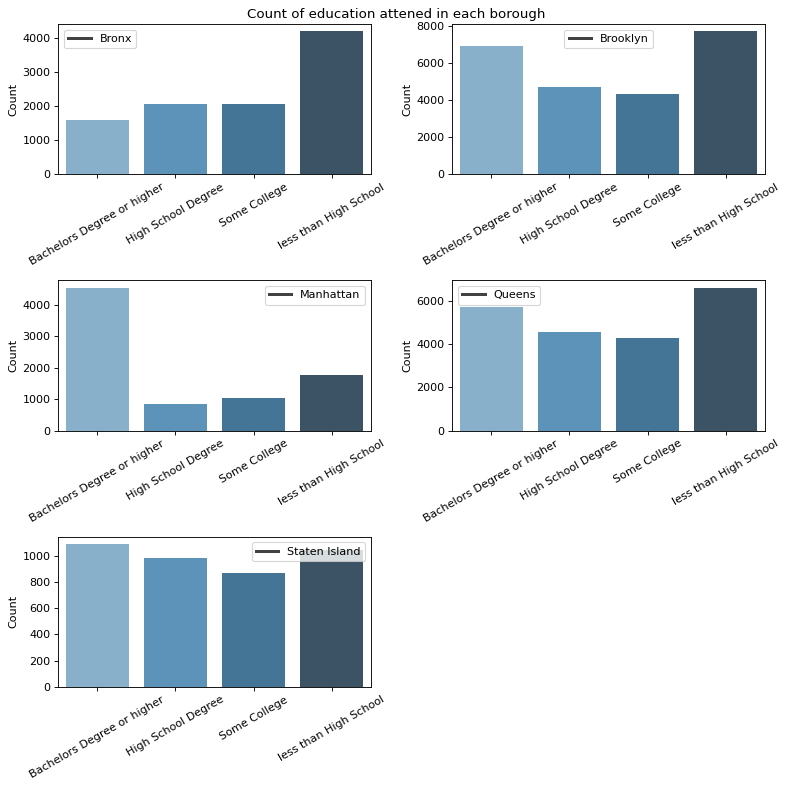

In [197]:
df_city_health = pd.DataFrame(data.groupby(['Boro','EducAttain'])['SERIALNO'].count()).reset_index()
df_city_health['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'],inplace=True)
df_city_health['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Boro'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'EducAttain', y = 'Count', data = df_city_health[df_city_health.Boro == dist], order = sorted(set(df_city_health.EducAttain)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.suptitle('Count of education attened in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

#### Poverty for sex and race

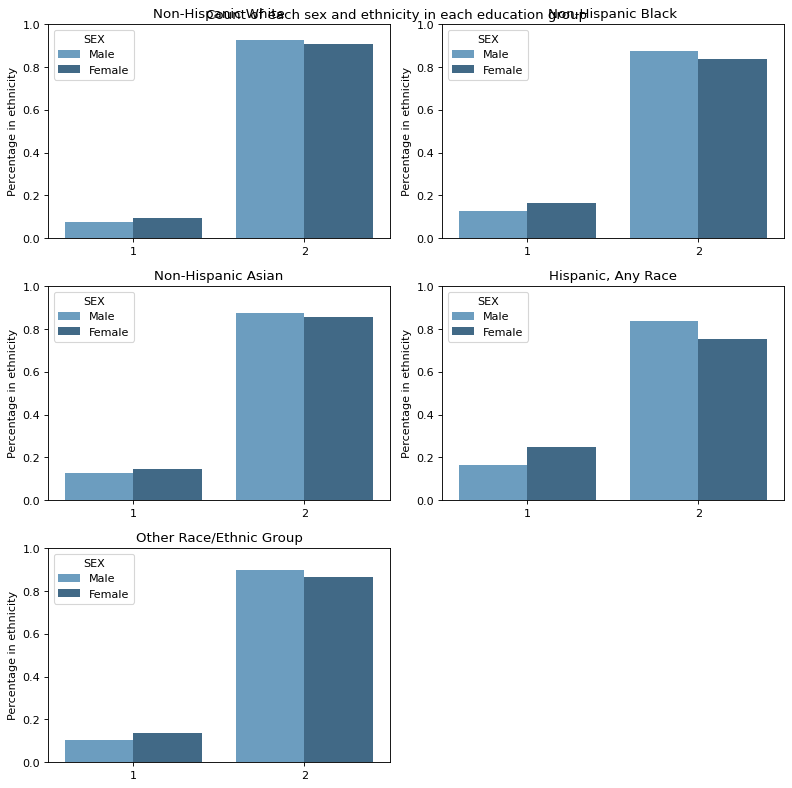

In [13]:
df_city_health = pd.DataFrame(data_adult.groupby(['Off_Pov_Stat','Ethnicity','SEX'])['SERIALNO'].count()).reset_index()
df_city_health['SEX'].replace([2,1],['Female','Male'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)
for eth in list(Ethnicity_map.keys()): 
    for sex in list(SEX_map.values()):
        df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex) , 'Count'] = df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex) , 'Count']/(sum(df_city_health.loc[(df_city_health['Ethnicity'] == eth) &(df_city_health['SEX'] == sex), 'Count']))

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Ethnicity'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'Off_Pov_Stat', y = 'Count',hue='SEX', data = df_city_health[df_city_health.Ethnicity == dist], order = sorted(set(df_city_health.Off_Pov_Stat)),\
        palette="Blues_d")
    #plt.legend(labels=[Education_map[dist],'Male', 'Female'])
    plt.xlabel('')
    plt.ylabel('Percentage in ethnicity')
    plt.ylim(0, 1)
    plt.title(Ethnicity_map[dist])
    i += 1
plt.suptitle('Count of each sex and ethnicity in each education group')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

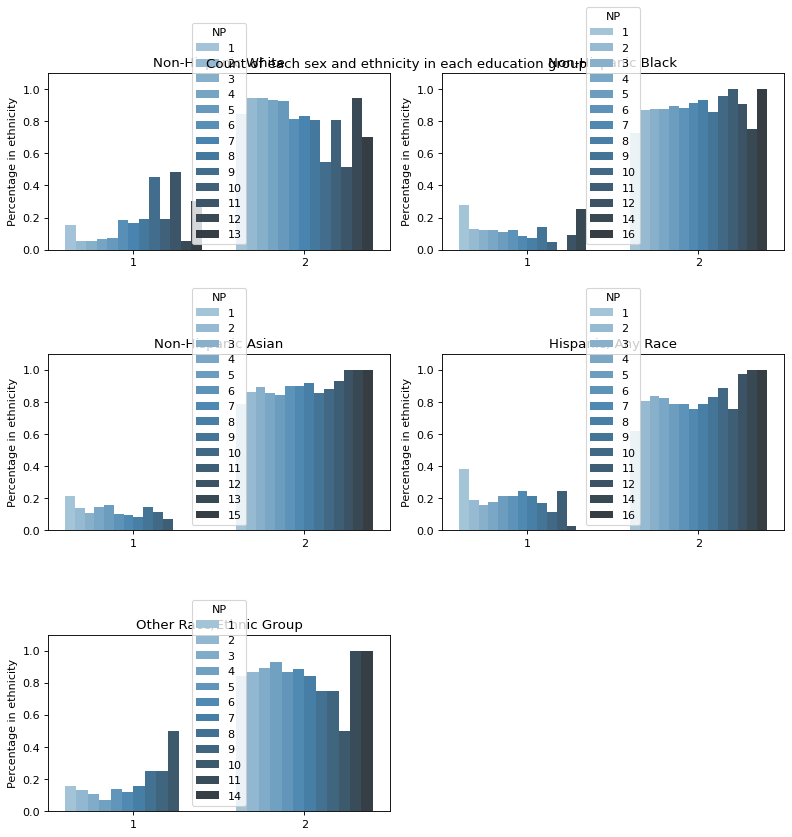

In [17]:
df_city_health = pd.DataFrame(data_adult.groupby(['Off_Pov_Stat','Ethnicity','NP'])['SERIALNO'].count()).reset_index()
#df_city_health['SEX'].replace([2,1],['Female','Male'],inplace=True)
df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)
for eth in list(Ethnicity_map.keys()): 
    for sex in list(set(df_city_health['NP'])):
        df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['NP'] == sex) , 'Count'] = df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['NP'] == sex) , 'Count']/(sum(df_city_health.loc[(df_city_health['Ethnicity'] == eth) &(df_city_health['NP'] == sex), 'Count']))

## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Ethnicity'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'Off_Pov_Stat', y = 'Count',hue='NP', data = df_city_health[df_city_health.Ethnicity == dist], order = sorted(set(df_city_health.Off_Pov_Stat)),\
        palette="Blues_d")
    #plt.legend(labels=[Education_map[dist],'Male', 'Female'])
    plt.xlabel('')
    plt.ylabel('Percentage in ethnicity')
    plt.ylim(0, 1.1)
    plt.title(Ethnicity_map[dist])
    i += 1
plt.suptitle('Count of each sex and ethnicity in each education group')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

In [22]:
#### Age and poverty 
df_city_health = pd.DataFrame(data.groupby(['AGEP','Off_Pov_Stat'])['SERIALNO'].count()).reset_index()
for i in list(set(df_city_health['AGEP'])):
    for k in [1,2]:
        df_city_health.loc[(df_city_health['AGEP'] == i) & (df_city_health['Off_Pov_Stat'] == i), 'SERIALNO'] /= sum(df_city_health.loc[(df_city_health['AGEP'] == i) & (df_city_health['Off_Pov_Stat'] == i), 'SERIALNO'])


    df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex) , 'Count'] = df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex) , 'Count']/(sum(df_city_health.loc[(df_city_health['Ethnicity'] == eth) & (df_city_health['SEX'] == sex), 'Count']))
#df_city_health['EducAttain'].replace([1,2,3,4],['less than High School','High School Degree','Some College','Bachelors Degree or higher'],inplace=True)
#df_city_health['Boro'].replace([1,2,3,4,5],['Bronx','Brooklyn','Manhattan', 'Queens','Staten Island'],inplace=True)
#df_city_health.rename(columns={'SERIALNO': 'Count'}, inplace=True)
df_city_health


,AGEP,Off_Pov_Stat,SERIALNO
0,0,1,155
1,0,2,562
2,1,1,165
3,1,2,580
4,2,1,174
...,...,...,...
181,90,2,80
182,91,1,12
183,91,2,61
184,94,1,54


In [ ]:




## Plot
figure(figsize=(10, 10), dpi=80)
i = 1
for dist in sorted(set(df_city_health['Boro'])): 
    plt.subplot(3, 2, i)
    ax = sns.barplot(x = 'EducAttain', y = 'Count', data = df_city_health[df_city_health.Boro == dist], order = sorted(set(df_city_health.EducAttain)),\
        palette="Blues_d")
    plt.legend(labels=[dist])
    plt.xlabel('')
    plt.ylabel('Count')
    i += 1
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.suptitle('Count of education attened in each borough')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

In [21]:
data_above.columns

Index(['SERIALNO', 'Total_income', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT',
       'REL', 'SCH', 'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR',
       'WKW', 'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro',
       'CitizenStatus', 'EducAttain', 'EST_Childcare', 'EST_Commuting',
       'EST_EITC', 'EST_FICAtax', 'EST_HEAP', 'EST_Housing', 'EST_IncomeTax',
       'EST_MOOP', 'EST_Nutrition', 'EST_PovGap', 'EST_PovGapIndex',
       'Ethnicity', 'FamType_PU', 'FTPTWork', 'INTP_adj', 'MRGP_adj',
       'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL', 'NYCgov_Threshold',
       'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 'Povunit_ID',
       'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 'SEMP_adj',
       'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj', 'AgeGroup'],
      dtype='object')

## Bokeh 

In [ ]:
## For the plot we will reload the data since they where modificed during the predious parts 
X_r = pd.read_csv("https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv")
features = ['age', 'sex', 'race','juv_fel_count','juv_misd_count','juv_other_count','priors_count','is_recid','days_b_screening_arrest','c_charge_degree']
target = ['two_year_recid']
X_r = X_r[features + target]

## Preprocess data
## is_recid not known  
X_r = X_r[X_r['is_recid'] != -1]

## only records cause jail time
set(X_r['c_charge_degree']) # There is none but will add it if it occurs in the futur
X_r = X_r[X_r['c_charge_degree'] != 'O']

## Records having -30 to 30 between arrest and screening 
X_r = X_r[(X_r['days_b_screening_arrest'] >=-30) & (X_r['days_b_screening_arrest'] <=30)]


## Create age-group
bins= np.arange(0,120,20)
labels = ['(' + str(x)+'-'+str(x+20)+']' for x in bins[:-1]]
X_r['AgeGroup'] = pd.cut(X_r['age'], bins=bins, labels=labels, right=True)
X_r.head()


def plot_expl(col):
    ## Create dataframe for each col-group
    data_ar = pd.DataFrame()
    for a in sorted(list(set(X_r[col]))):
        temp_count = len(X_r[X_r[col] == a])
        temp_recom = len(X_r[((X_r[col] == a) & (X_r["is_recid"] == 1))])

        df_temp = pd.DataFrame({'Count': temp_count, 'Recommitted':temp_recom},index=[a])
        data_ar = pd.concat([data_ar,df_temp], axis=0)

    data_ar.fillna(0, inplace=True)


    ## Plot
    data_ar['frac_at'] = data_ar['Recommitted'] / data_ar['Count']
    data_ar['frac_all'] = data_ar['Recommitted'] / data_ar['Recommitted'].sum()

    plot_col =['Count','Recommitted']

    CDS_data = ColumnDataSource(data=data_ar)

    #Choose a title
    title = 'Number of Samples by' + col+ ' and recommited crimes'

    #Establish which categories will appear when hovering over each node
    HOVER_TOOLTIPS = [
            ("Fraction of recommitted crimes in the "+ col, "@frac_at"),
            ('Fraction of recommitted crimes over all ' + col, '@frac_all')
    ]

    #Create a plot — set dimensions, toolbar, and title
    p = figure(tooltips = HOVER_TOOLTIPS,
                tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
                title=title,
                x_axis_label = col, 
                y_axis_label = "Number of samples",
                x_range = list(data_ar.index))
        

    bar ={} # to store vbars 

    # here we will do a for loop to create a bar for each age-group
    color_bar = ['red', 'blue']
    for indx,i in enumerate(data_ar.columns[0:2]):
        if indx == 0:
            bar[indx] = p.vbar(x="index",  top=i, source= CDS_data, color=color_bar[indx], width=0.5)
            #
            #p.add_tools(HOVER_TOOLTIPS)
        else:
            bar[indx] = p.vbar(x="index",  top=i, source= CDS_data, color=color_bar[indx],  width=0.5)

    items = [] # for the custom legend // you need to figure out where to add it
    for indx,i in enumerate(data_ar.columns[0:2]):
        items.append((i, [bar[indx]])) # figure out where to add it

    legend = Legend(items=items, location="top_right") # figure out where to add it


    p.add_layout(legend, "right") # figure where to add it # if you read the guide, it will make sense :)
    p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide')

    return p


## Plot for the 3 different types 
p = plot_expl("AgeGroup")
p2 = plot_expl("sex")
p3 = plot_expl("race")

## Combine 
l1 = layout([[p]])
l2 = layout([[p2]])
l3 = layout([[p3]])

tab1 = Panel(child=l1,title="Age group")
tab2 = Panel(child=l2,title="Sex")
tab3 = Panel(child=l3,title="Race")
tabs = Tabs(tabs=[ tab1, tab2, tab3 ])

curdoc().add_root(tabs)

show(tabs)
